## Exemplos de inferência estatística em Python

### Packages

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

### Distribuições e funções relacionadas

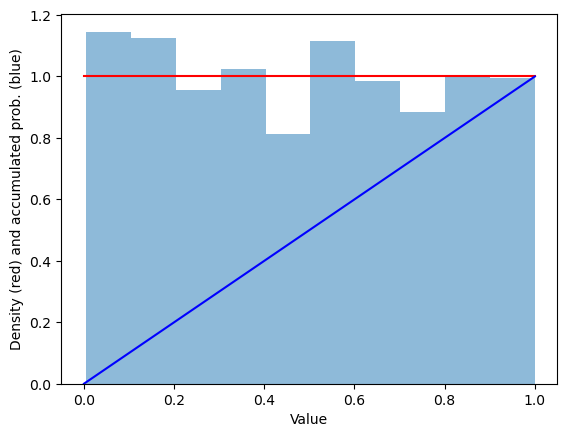

In [2]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate 1000 points from a uniform distribution between 0 and 1
data = np.random.uniform(size=1000)

# Plot a histogram of the data
plt.hist(data, density=True, alpha=0.5)

# Generate a range of values to use for the density plot
x = np.linspace(0, 1, 100)

# Calculate the probability density at each point in the range
density = stats.uniform.pdf(x)

# Plot the density as a line overlaid on the histogram
plt.plot(x, density, color='red')

cdf = stats.uniform.cdf(x)
plt.plot(x, cdf, color='blue')


# Add labels and a title to the plot
plt.xlabel("Value")
plt.ylabel("Density (red) and accumulated prob. (blue)")

# Display the plot
plt.show()

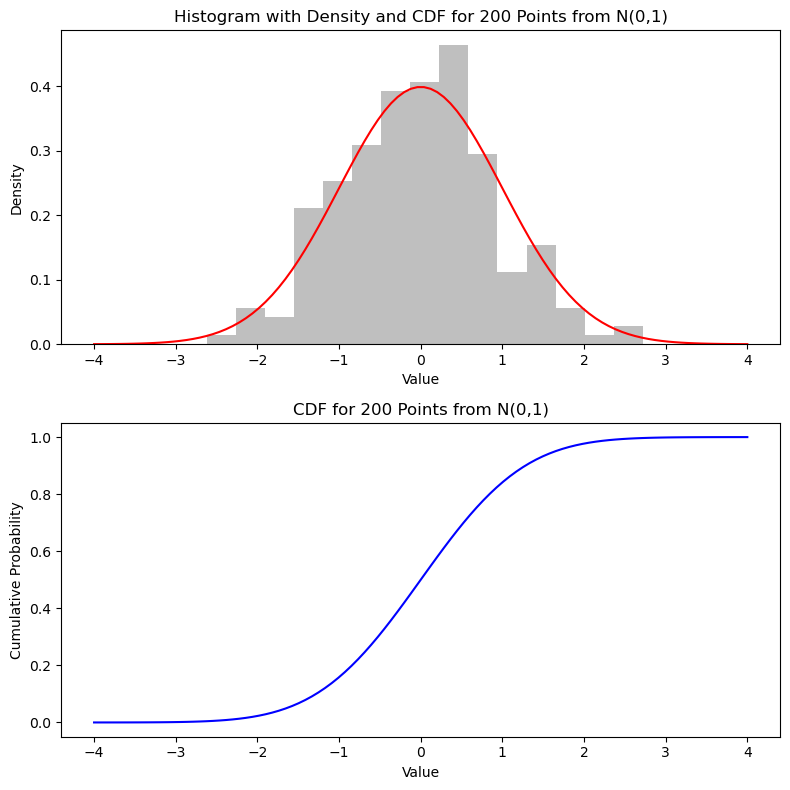

In [3]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate 200 points from a normal distribution with mean 0 and standard deviation 1
data = np.random.normal(loc=0, scale=1, size=200)

# Create a range of values to use for the plots
x = np.linspace(-4, 4, 100)

# Calculate the probability density function (pdf) and cumulative distribution function (cdf) at each point in the range
pdf = stats.norm.pdf(x)
cdf = stats.norm.cdf(x)

# Create a figure with two subplots, one for the histogram and pdf, and one for the cdf
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Plot the histogram of the data on the first subplot
ax1.hist(data, bins=15, density=True, alpha=0.5, color='grey')

# Overlay the pdf on the histogram in red
ax1.plot(x, pdf, color='red')

# Set labels and title for the first subplot
ax1.set_xlabel("Value")
ax1.set_ylabel("Density")
ax1.set_title("Histogram with Density and CDF for 200 Points from N(0,1)")

# Plot the cdf on the second subplot
ax2.plot(x, cdf, color='blue')

# Set labels and title for the second subplot
ax2.set_xlabel("Value")
ax2.set_ylabel("Cumulative Probability")
ax2.set_title("CDF for 200 Points from N(0,1)")

# Adjust the layout of the subplots and display the plot
fig.tight_layout()
plt.show()


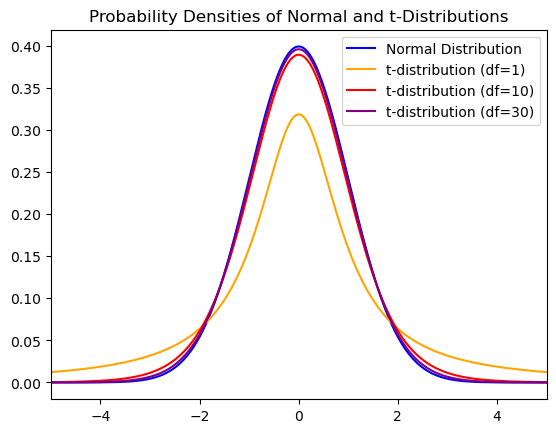

In [4]:
# Define the range of values to plot
x = np.linspace(-5, 5, 500)

# Define the normal distribution with mean 0 and standard deviation 1
normal = stats.norm.pdf(x)

# Define the t-distributions with 1, 10, and 30 degrees of freedom
t1 = stats.t.pdf(x, df=1)
t10 = stats.t.pdf(x, df=10)
t30 = stats.t.pdf(x, df=30)

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the normal distribution in blue
ax.plot(x, normal, color='blue', label='Normal Distribution')

# Plot the t-distributions in orange, red, and purple
ax.plot(x, t1, color='orange', label='t-distribution (df=1)')
ax.plot(x, t10, color='red', label='t-distribution (df=10)')
ax.plot(x, t30, color='purple', label='t-distribution (df=30)')

# Set the x-axis limits
ax.set_xlim(-5, 5)

# Add a legend and title
ax.legend()
ax.set_title('Probability Densities of Normal and t-Distributions')

# Display the plot
plt.show()

### Simulação do teorema do limite central

In [5]:
import numpy as np

numsims = 1000
tam = 10
values = np.random.normal(size=numsims * tam)
m = np.reshape(values, (numsims, tam))

print(np.mean(m))
print(np.std(m))

-0.0021125767706042394
1.0045178199873352


In [6]:
medias = np.mean(m, axis=1)

print(np.mean(medias))
print(np.std(medias))
print(1 / np.sqrt(tam))

-0.0021125767706042407
0.31477305830882285
0.31622776601683794


In [7]:
numsims = 1000
tam = 10
values_u = np.random.uniform(size=numsims * tam)
m_u = np.reshape(values_u, (numsims, tam))

print(np.mean(m_u))
print(np.std(m_u))
print(1 / np.sqrt(12))

0.5080396367518123
0.289649652027278
0.2886751345948129


In [8]:
medias_u = np.mean(m_u, axis=1)

print(np.mean(medias_u))
print(np.std(medias_u))
print(1 / np.sqrt(12*tam))

0.5080396367518123
0.09453252831254559
0.09128709291752768


### Comparing distributions

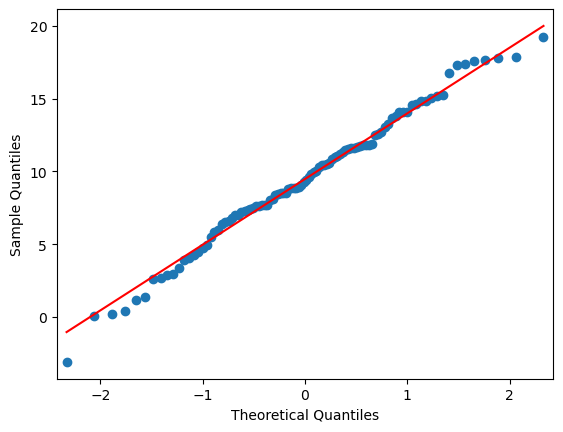

In [9]:
# Generate 100 random points with mean 10 and std 5
np.random.seed(42)
data = np.random.normal(loc=10, scale=5, size=100)

# Create a quantile-quantile plot of the data
fig = sm.qqplot(data, line = "s")

# Add labels and a title to the plot
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Display the plot
plt.show()

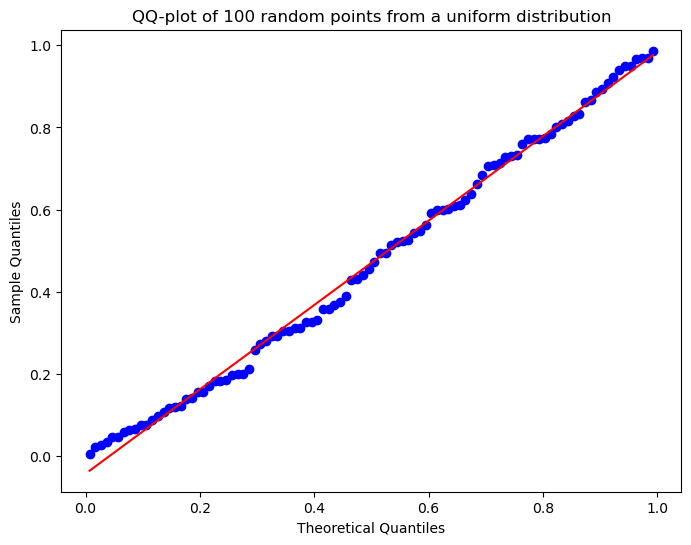

In [10]:
# Generate 100 random points from a uniform distribution
np.random.seed(42)
data = np.random.uniform(size=100)

# Create a quantile-quantile plot of the data
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
stats.probplot(data, dist="uniform", plot=ax)

# Add labels and a title to the plot
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("QQ-plot of 100 random points from a uniform distribution")

# Display the plot
plt.show()

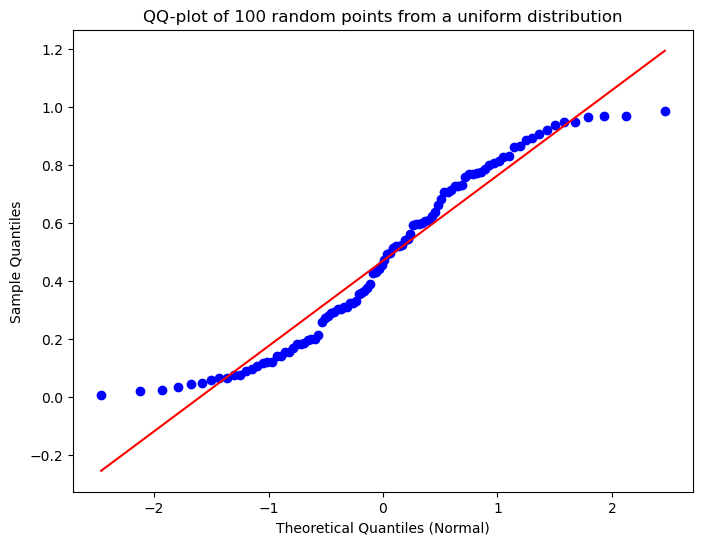

In [11]:
# Create a quantile-quantile plot of the data
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
stats.probplot(data, dist="norm", plot=ax)

# Add labels and a title to the plot
plt.xlabel("Theoretical Quantiles (Normal)")
plt.ylabel("Sample Quantiles")
plt.title("QQ-plot of 100 random points from a uniform distribution")

# Display the plot
plt.show()

### Testes de hipóteses

In [12]:
from scipy.stats import t

# Define the sample values
x = np.array([175, 176, 173, 175, 174, 173, 173, 176, 173, 179])

# Calculate the sample mean and standard deviation
sample_mean = np.mean(x)
sample_std = np.std(x, ddof=1)

# Calculate the t-value for the 95% confidence interval with 9 degrees of freedom
t_value = t.ppf(0.975, df=9)

# Calculate the margin of error
margin_of_error = t_value * sample_std / np.sqrt(len(x))

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

confidence_interval

(173.30755288755185, 176.09244711244813)

In [13]:
from scipy.stats import ttest_1samp

ttest_result = ttest_1samp(x, popmean = 0)

ttest_result.confidence_interval()

ConfidenceInterval(low=173.30755288755185, high=176.09244711244813)

In [14]:
res = ttest_1samp(x, popmean = 175)
print(res.pvalue)
print(res.statistic)
print(res.df)

0.6376422052940726
-0.4873773249665126
9


In [15]:
res = ttest_1samp(x, popmean = 0)
print(res.pvalue)

4.259313480395569e-19


In [16]:
from scipy.stats import wilcoxon

# Perform the one-sample Wilcoxon signed-rank test
test_statistic, p_value = wilcoxon(x)

# Print the test statistic and p-value
print("Wilcoxon test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.4f}".format(p_value))

Wilcoxon test statistic: 0.00
p-value: 0.0020


In [17]:
from scipy.stats import ttest_ind

# Define the two samples
drug = np.array([15, 10, 13, 7, 9, 8, 21, 9, 14, 8])
placebo = np.array([15, 14, 12, 8, 14, 7, 16, 10, 15, 12])

# Perform the two-sample t-test assuming equal variances and a one-tailed alternative hypothesis (drug < placebo)
test_statistic, p_value = ttest_ind(drug, placebo, alternative='less', equal_var=True)

# Print the test statistic and p-value
print("t-test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.4f}".format(p_value))

t-test statistic: -0.53
p-value: 0.3002


In [18]:
from scipy.stats import ttest_rel

diag_med1 = [3, 0, 5, 2, 5, 5, 5, 4, 4, 5]
diag_med2 = [2, 1, 4, 1, 4, 3, 3, 2, 3, 5]

t_stat, p_val = ttest_rel(diag_med1, diag_med2)

print("T-statistic:", t_stat)
print("p-value:", p_val)

T-statistic: 3.3541019662496843
p-value: 0.00846815040315423


In [19]:
from scipy.stats import chisquare
freq_dados = [22, 21, 22, 27, 22, 36]
res = chisquare(freq_dados)
print(res.pvalue)

0.24231086039631416


In [20]:
freqs_letras = [100,110,80,55,14]
sum_fl = sum(freqs_letras)
expected = np.array([0.29, 0.21, 0.17, 0.17, 0.16])*sum_fl

res = chisquare(freqs_letras, expected)
print(res.pvalue)

2.6845339866838983e-11


In [21]:
from scipy.stats import shapiro

n = np.random.normal(size=100)
stat, p = shapiro(n)

print('Shapiro-Wilk test statistic:', stat)
print('p-value:', p)

Shapiro-Wilk test statistic: 0.9887054562568665
p-value: 0.5615829825401306


In [22]:
u = np.random.uniform(size=100)
stat, p = shapiro(u)

print('Shapiro-Wilk test statistic:', stat)
print('p-value:', p)

Shapiro-Wilk test statistic: 0.9540252089500427
p-value: 0.0015426279278472066


Shapiro-Wilk p-value:  0.10112646222114563


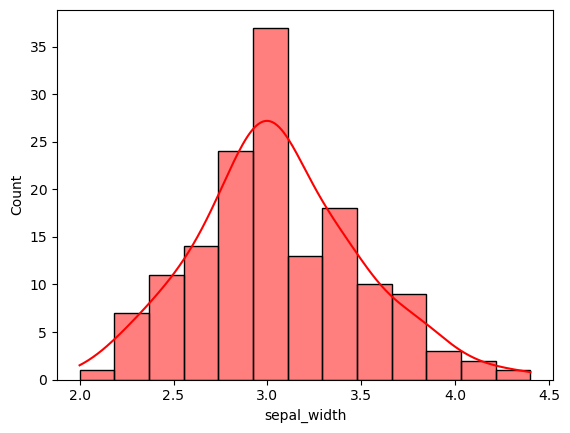

In [23]:
import seaborn as sns

# Load iris dataset
iris = sns.load_dataset('iris')

# Plot histogram and density
sns.histplot(data=iris, x='sepal_width', color='red', kde=True)

# Perform Shapiro-Wilk test
_, p_value = stats.shapiro(iris['sepal_width'])
print("Shapiro-Wilk p-value: ", p_value)

### Testes múltiplos

In [24]:
from statsmodels.stats.multitest import multipletests

m = np.random.normal(size=(100, 60))
tt = lambda x: ttest_ind(x[:30], x[30:])[1]
pvalues = np.apply_along_axis(tt, axis=1, arr=m)
print(sum(pvalues < 0.05))

adj_bonf = multipletests(pvalues, method='bonferroni')[1]
print(sum(adj_bonf < 0.05))

1
0


In [25]:
adj_bh = multipletests(pvalues, method='fdr_bh')[1]
print(np.sum(adj_bh < 0.05))

0


In [26]:
m1 = np.random.normal(size=(50, 60))
m2 = np.hstack([np.random.normal(size=(50, 30)), np.random.normal(loc=1, size=(50, 30))])
mt = np.vstack([m1, m2])

def tt(x):
    return ttest_rel(x[:30], x[30:])[1]

pvalues_2 = np.apply_along_axis(tt, axis=1, arr=mt)
res_verd = np.array(['nao rej']*50 + ['rej']*50)
res_test = pvalues_2 < 0.05

pd.crosstab(res_test, res_verd)

col_0,nao rej,rej
row_0,,
False,48,0
True,2,50


In [27]:
adj_bonf_2 = multipletests(pvalues_2, method='bonferroni')[1]
res_test_2 = adj_bonf_2 < 0.05
pd.crosstab(res_test_2, res_verd)

col_0,nao rej,rej
row_0,,
False,50,26
True,0,24


In [28]:
adj_bh_2 = multipletests(pvalues_2, method='fdr_bh')[1]
res_test_3 = adj_bh_2 < 0.05
pd.crosstab(res_test_3, res_verd)

col_0,nao rej,rej
row_0,,
False,49,0
True,1,50


### Análise de variância e regressão linear


In [30]:
from scipy.stats import f_oneway

prof1 = [4,3,4,5,2,3,4,5]
prof2 = [4,4,5,5,4,5,4,4]
prof3 = [3,4,2,4,5,5,4,4]
notas = pd.DataFrame({'prof1': prof1, 'prof2': prof2, 'prof3': prof3})

F, p = f_oneway(notas.prof1, notas.prof2, notas.prof3)

print('One-way analysis of means')
print(f'F = {F}, p-value = {p}')

One-way analysis of means
F = 1.1307692307692307, p-value = 0.34166385145199196


In [31]:
stats.kruskal(notas.prof1, notas.prof2, notas.prof3)

KruskalResult(statistic=1.938748079877106, pvalue=0.3793204032280171)

In [32]:
import statsmodels.stats.multicomp as mc
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('petal_length ~ species', data=iris).fit()
anova_results = anova_lm(model)

# perform Tukey HSD test
tukey_results = mc.pairwise_tukeyhsd(endog=iris['petal_length'], groups=iris['species'])

# print ANOVA summary
print(anova_results)

# print Tukey HSD results
print(tukey_results)

             df    sum_sq     mean_sq            F        PR(>F)
species     2.0  437.1028  218.551400  1180.161182  2.856777e-91
Residual  147.0   27.2226    0.185188          NaN           NaN
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


In [34]:
import statsmodels.api as sm

df = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data
df

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5


                            OLS Regression Results                            
Dep. Variable:            childHeight   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     107.0
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           8.05e-24
Time:                        15:22:43   Log-Likelihood:                -2465.0
No. Observations:                 934   AIC:                             4934.
Df Residuals:                     932   BIC:                             4944.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          22.6362      4.265     

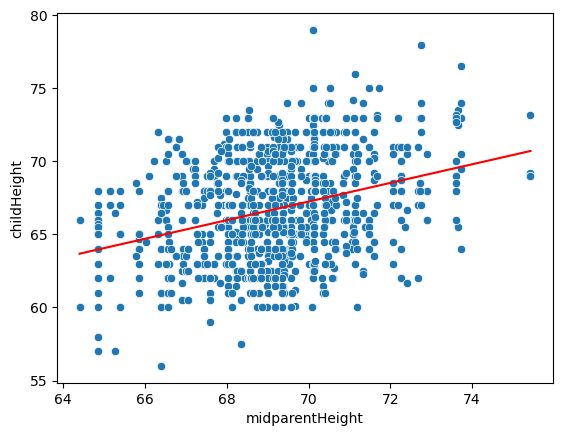

In [35]:
# Load the Galton dataset
galton_df = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Plot the data
sns.scatterplot(data=galton_df, x='midparentHeight', y='childHeight')

# Fit the linear regression model
model = ols('childHeight ~ midparentHeight', data=galton_df).fit()

# Print the model summary
print(model.summary())

# Plot the regression line
sns.lineplot(data=galton_df, x='midparentHeight', y=model.fittedvalues, color='red')

# Show the plot
plt.show()

In [36]:
X = iris[['petal_width', 'sepal_length']]
y = iris['petal_length']

X = sm.add_constant(X) # add an intercept term to the model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1354.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           2.01e-95
Time:                        15:22:46   Log-Likelihood:                -75.090
No. Observations:                 150   AIC:                             156.2
Df Residuals:                     147   BIC:                             165.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.5071      0.337     -4.473   

In [37]:
# fit linear regression model with interaction term
fit2 = sm.OLS.from_formula("petal_length ~ petal_width * sepal_length", iris).fit()

# print summary
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     975.4
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           2.45e-96
Time:                        15:22:52   Log-Likelihood:                -69.096
No. Observations:                 150   AIC:                             146.2
Df Residuals:                     146   BIC:                             158.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               